# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [55]:
#Your code here 
import pandas as pd
import json
file = open('disease_data.json')
data = json.load(file)

## Explore the first and second levels of the schema hierarchy

In [56]:
#Your code here
data.keys()

dict_keys(['meta', 'data'])

In [57]:
data['meta'].keys()

dict_keys(['view'])

In [58]:
data['meta']['view'].keys()

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [59]:
data['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [60]:
data['data'].keys()

AttributeError: 'list' object has no attribute 'keys'

In [61]:
len(data['data'])

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [62]:
#Your code here
df = pd.DataFrame(data['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [63]:
df.columns = [x['name'] for x in data['meta']['view']['columns']]

In [64]:
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [67]:
df['Topic'].unique()

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes',
       'Mental Health', 'Chronic Obstructive Pulmonary Disease',
       'Oral Health', 'Cardiovascular Disease', 'Immunization',
       'Chronic Kidney Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Tobacco', 'Overarching Conditions', 'Reproductive Health',
       'Disability'], dtype=object)

In [68]:
df['Question'].unique()

array(['Binge drinking prevalence among adults aged >= 18 years',
       'Binge drinking intensity among adults aged >= 18 years who binge drink',
       'Heavy drinking among adults aged >= 18 years',
       'Binge drinking prevalence among women aged 18-44 years',
       'Binge drinking frequency among adults aged >= 18 years who binge drink',
       'Heavy drinking among women aged 18-44 years',
       'Arthritis among adults aged >= 18 years',
       'Current asthma prevalence among adults aged >= 18 years',
       'Arthritis among adults aged >= 18 years who are obese',
       'Arthritis among adults aged >= 18 years who have diabetes',
       'Arthritis among adults aged >= 18 years who have heart disease',
       'Asthma prevalence among women aged 18-44 years',
       'Physical inactivity among adults aged >= 18 years with arthritis',
       'Fair or poor health among adults aged >= 18 years with arthritis',
       'Influenza vaccination among noninstitutionalized adults aged 1

In [69]:
df_asthma = df[df['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
df_asthma.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,...,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,...,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,...,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,...,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,...,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [70]:
df['LocationAbbr'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU', 'PR', 'VI'],
      dtype=object)

In [71]:
df_asthma[df_asthma['LocationAbbr'] == 'CA']

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9430,9428,CD1718CB-7515-4340-BF97-1FCA8FE928E4,9428,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9485,9483,12D16719-3DFD-40D9-8580-B47BE16C7D9E,9483,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
9529,9526,216B1923-E321-40CD-96A5-E612BF945A4F,9526,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,AGEADJPREV,GENDER,GENM,None,None,None,None
9584,9581,9AA04301-E368-495C-8CF6-3BDB8AA7235D,9581,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,GENDER,GENF,None,None,None,None
9638,9635,3B31703C-4FA6-44A6-910B-0FB0640A6C62,9635,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,AGEADJPREV,GENDER,GENF,None,None,None,None
9691,9688,5D0CF30F-7935-43F4-B25D-89862458FE08,9688,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,RACE,WHT,None,None,None,None
9745,9742,E5A59094-60FD-46DC-945C-E1BF9A42CCA8,9742,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,AGEADJPREV,RACE,WHT,None,None,None,None
9800,9797,65F505CF-2132-4F26-8035-103D9599360A,9797,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,RACE,BLK,None,None,None,None
9854,9851,E6F11A9C-6C81-4FD6-89CB-F11675B717DB,9851,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,AGEADJPREV,RACE,BLK,None,None,None,None


In [72]:
df_asthma[(df_asthma['LocationAbbr'] == 'CA') & (df_asthma['StratificationCategoryID1'] == 'OVERALL') &
         (df_asthma['DataValueTypeID'] == 'CRDPREV')]

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [77]:
#remove States
df_asthma = df_asthma[(df_asthma['StratificationCategoryID1'] == 'OVERALL') &
         (df_asthma['DataValueTypeID'] == 'CRDPREV')]
df_asthma.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9370,9368,DA78CA14-AF4B-49EA-9B9D-5D01C233A286,9368,1527194523,959778,1527194523,959778,None,2016,2016,...,59,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [78]:
df_asthma.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [74]:
df_asthma[['LocationAbbr', 'DataValue']].head()

,LocationAbbr,DataValue
9370,US,9.3
9371,AL,9.7
9372,AK,8.8
9373,AZ,9.4
9374,AR,8.5


In [97]:
to_plot = df_asthma[['LocationAbbr', 'DataValue']].sort_values(by = 'DataValue')
to_plot.head(10)

,LocationAbbr,DataValue
9422,GU,5.1
9412,SD,6.2
9424,VI,6.3
9380,FL,6.7
9414,TX,7.6
9394,MN,7.6
9375,CA,7.8
9386,IA,7.8
9399,NV,7.9
9404,NC,8.0


In [93]:
df_asthma[['LocationAbbr', 'DataValue']].dtypes

LocationAbbr     object
DataValue       float64
dtype: object

In [94]:
df_asthma['DataValue'] = df_asthma['DataValue'].astype(float)

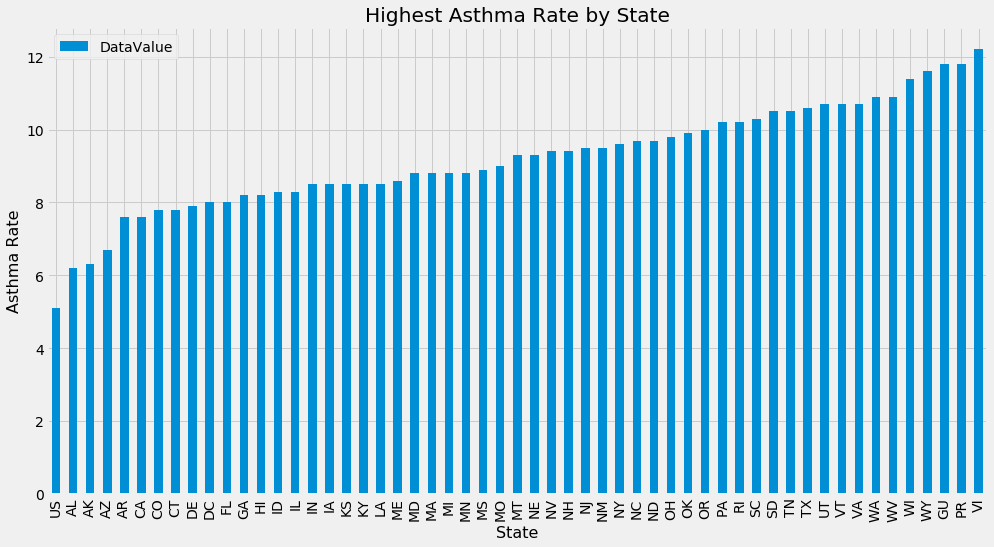

In [114]:
with plt.style.context('fivethirtyeight'):
    to_plot.plot(kind = 'bar', figsize = (15, 8))
    plt.xticks(range(len(df_asthma['DataValue'])), df_asthma['LocationAbbr'])
    plt.xlabel('State', fontsize = 16)
    plt.ylabel('Asthma Rate', fontsize = 16)
    plt.title('Highest Asthma Rate by State')
    plt.show()

OR ALTERNATIVE WAY TO PLOT

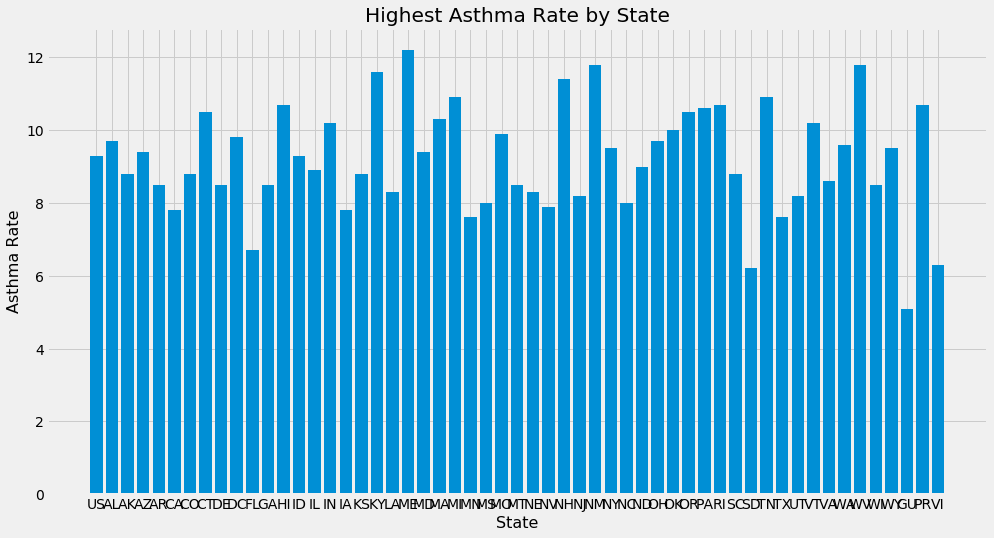

In [110]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (15, 8))
    plt.bar(x = range(len(df_asthma['DataValue'])), height = df_asthma['DataValue'])
    plt.xticks(range(len(df_asthma['DataValue'])), df_asthma['LocationAbbr'])
    plt.xlabel('State', fontsize = 16)
    plt.ylabel('Asthma Rate', fontsize = 16)
    plt.title('Highest Asthma Rate by State')
    plt.show()

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!